In [3]:
import torch
import torchvision as tv
import time

import matplotlib.pyplot as plt

## Подготовка данных

In [4]:
# на таких данных GPU на M1 работает медленнее, потому работаем на CPU.
# if torch.backends.mps.is_available():
#     device = torch.device("mps")
# else:
device = torch.device("cpu")

In [5]:
BATCH_SIZE=256
train_dataset = tv.datasets.FashionMNIST('.', train=True, transform=tv.transforms.ToTensor(), download=True)
test_dataset = tv.datasets.FashionMNIST('.', train=False, transform=tv.transforms.ToTensor(), download=True)
train = torch.utils.data.DataLoader(train_dataset, batch_size=BATCH_SIZE)
test = torch.utils.data.DataLoader(test_dataset, batch_size=BATCH_SIZE)

## Просмотр данных

In [71]:
train_dataset[0][0].shape

torch.Size([1, 28, 28])

In [72]:
image, label = train_dataset[100]

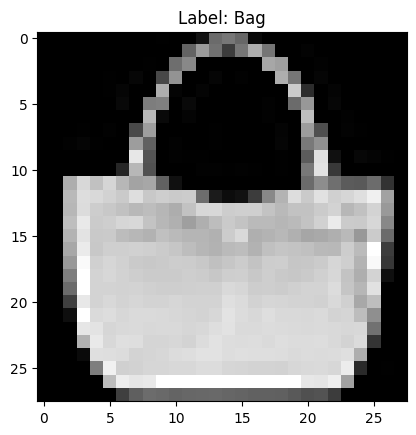

In [73]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.imshow(image.squeeze(), cmap='gray') # Use .squeeze() to remove the single color channel dimension
plt.title(f"Label: {class_names[label]}")
plt.show()

## Модель

In [74]:
model = torch.nn.Sequential(
    torch.nn.Flatten(),
    torch.nn.Linear(784, 256),
    torch.nn.ReLU(),
    torch.nn.Linear(256, 10)
)

In [75]:
model = model.to(device)

In [7]:
loss = torch.nn.CrossEntropyLoss()
trainer = torch.optim.SGD(model.parameters(), lr=.01)
num_epochs = 10

In [77]:
def train_model():
    for ep in range(num_epochs):
        train_iters, train_passed  = 0, 0
        train_loss, train_acc = 0., 0.
        start=time.time()
        
        model.train()
        for X, y in train:
            X = X.to(device)
            y = y.to(device)
            trainer.zero_grad()
            y_pred = model(X)
            l = loss(y_pred, y)
            l.backward()
            trainer.step()
            train_loss += l.item()
            train_acc += (y_pred.argmax(dim=1) == y).sum().item()
            train_iters += 1
            train_passed += len(X)
        
        test_iters, test_passed  = 0, 0
        test_loss, test_acc = 0., 0.
        model.eval()
        for X, y in test:
            X = X.to(device)
            y = y.to(device)
            y_pred = model(X)
            l = loss(y_pred, y)
            test_loss += l.item()
            test_acc += (y_pred.argmax(dim=1) == y).sum().item()
            test_iters += 1
            test_passed += len(X)
            
        print("ep: {}, taked: {:.3f}, train_loss: {:.3f}, train_acc: {:.3f}, test_loss: {:.3f}, test_acc: {:.3f}".format(
            ep, time.time() - start, train_loss / train_iters, train_acc / train_passed,
            test_loss / test_iters, test_acc / test_passed)
        )

In [78]:
train_model()

ep: 0, taked: 2.058, train_loss: 1.757, train_acc: 0.557, test_loss: 1.299, test_acc: 0.647
ep: 1, taked: 2.011, train_loss: 1.083, train_acc: 0.677, test_loss: 0.950, test_acc: 0.679
ep: 2, taked: 2.013, train_loss: 0.866, train_acc: 0.713, test_loss: 0.819, test_acc: 0.713
ep: 3, taked: 2.010, train_loss: 0.769, train_acc: 0.744, test_loss: 0.746, test_acc: 0.739
ep: 4, taked: 2.005, train_loss: 0.709, train_acc: 0.764, test_loss: 0.697, test_acc: 0.758
ep: 5, taked: 2.045, train_loss: 0.666, train_acc: 0.780, test_loss: 0.660, test_acc: 0.772
ep: 6, taked: 2.031, train_loss: 0.633, train_acc: 0.791, test_loss: 0.632, test_acc: 0.782
ep: 7, taked: 2.029, train_loss: 0.607, train_acc: 0.799, test_loss: 0.610, test_acc: 0.789
ep: 8, taked: 2.097, train_loss: 0.586, train_acc: 0.806, test_loss: 0.591, test_acc: 0.796
ep: 9, taked: 2.063, train_loss: 0.568, train_acc: 0.811, test_loss: 0.576, test_acc: 0.802


## Попробуем Adam

In [79]:
model = torch.nn.Sequential(
    torch.nn.Flatten(),
    torch.nn.Linear(784, 256),
    torch.nn.ReLU(),
    torch.nn.Linear(256, 10)
)
model = model.to(device)

In [80]:
trainer = torch.optim.Adam(model.parameters(), lr=.01)
train_model()

ep: 0, taked: 2.176, train_loss: 0.541, train_acc: 0.809, test_loss: 0.449, test_acc: 0.834
ep: 1, taked: 2.111, train_loss: 0.384, train_acc: 0.860, test_loss: 0.409, test_acc: 0.854
ep: 2, taked: 2.132, train_loss: 0.347, train_acc: 0.873, test_loss: 0.389, test_acc: 0.860
ep: 3, taked: 2.122, train_loss: 0.330, train_acc: 0.879, test_loss: 0.404, test_acc: 0.858
ep: 4, taked: 2.125, train_loss: 0.316, train_acc: 0.883, test_loss: 0.399, test_acc: 0.860
ep: 5, taked: 2.117, train_loss: 0.304, train_acc: 0.888, test_loss: 0.394, test_acc: 0.862
ep: 6, taked: 2.141, train_loss: 0.292, train_acc: 0.891, test_loss: 0.384, test_acc: 0.865
ep: 7, taked: 2.123, train_loss: 0.286, train_acc: 0.893, test_loss: 0.395, test_acc: 0.862
ep: 8, taked: 2.123, train_loss: 0.278, train_acc: 0.896, test_loss: 0.388, test_acc: 0.867
ep: 9, taked: 2.126, train_loss: 0.270, train_acc: 0.899, test_loss: 0.401, test_acc: 0.865


Переход на adam повысил качество обучения

## Попробуем больше слоев и сразу batch norm

In [83]:
model = torch.nn.Sequential(
    torch.nn.Flatten(),
    torch.nn.Linear(784, 512),
    torch.nn.ReLU(),
    torch.nn.BatchNorm1d(512),
    torch.nn.Linear(512, 256),
    torch.nn.ReLU(),
    torch.nn.BatchNorm1d(256),
    torch.nn.Linear(256, 128),
    torch.nn.ReLU(),
    torch.nn.BatchNorm1d(128),
    torch.nn.Linear(128, 10)
)
model = model.to(device)

In [84]:
trainer = torch.optim.Adam(model.parameters(), lr=.01)
train_model()

ep: 0, taked: 2.888, train_loss: 0.468, train_acc: 0.829, test_loss: 0.434, test_acc: 0.839
ep: 1, taked: 2.849, train_loss: 0.371, train_acc: 0.864, test_loss: 0.389, test_acc: 0.857
ep: 2, taked: 2.892, train_loss: 0.336, train_acc: 0.876, test_loss: 0.424, test_acc: 0.844
ep: 3, taked: 2.862, train_loss: 0.312, train_acc: 0.884, test_loss: 0.423, test_acc: 0.851
ep: 4, taked: 2.873, train_loss: 0.298, train_acc: 0.889, test_loss: 0.404, test_acc: 0.863
ep: 5, taked: 2.894, train_loss: 0.282, train_acc: 0.896, test_loss: 0.409, test_acc: 0.867
ep: 6, taked: 2.879, train_loss: 0.273, train_acc: 0.898, test_loss: 0.387, test_acc: 0.866
ep: 7, taked: 2.970, train_loss: 0.258, train_acc: 0.905, test_loss: 0.393, test_acc: 0.868
ep: 8, taked: 3.047, train_loss: 0.248, train_acc: 0.907, test_loss: 0.418, test_acc: 0.872
ep: 9, taked: 2.904, train_loss: 0.239, train_acc: 0.911, test_loss: 0.410, test_acc: 0.856


Тут сразу не скажешь, стало лучше или нет.

## Узнаем, что будет на большем количестве эпох

In [86]:
num_epochs = 30
model = torch.nn.Sequential(
    torch.nn.Flatten(),
    torch.nn.Linear(784, 512),
    torch.nn.ReLU(),
    torch.nn.BatchNorm1d(512),
    torch.nn.Linear(512, 256),
    torch.nn.ReLU(),
    torch.nn.BatchNorm1d(256),
    torch.nn.Linear(256, 128),
    torch.nn.ReLU(),
    torch.nn.BatchNorm1d(128),
    torch.nn.Linear(128, 10)
)
model = model.to(device)

In [87]:
trainer = torch.optim.Adam(model.parameters(), lr=.01)
train_model()

ep: 0, taked: 2.932, train_loss: 0.473, train_acc: 0.825, test_loss: 0.454, test_acc: 0.825
ep: 1, taked: 2.858, train_loss: 0.370, train_acc: 0.864, test_loss: 0.415, test_acc: 0.852
ep: 2, taked: 2.859, train_loss: 0.337, train_acc: 0.875, test_loss: 0.406, test_acc: 0.856
ep: 3, taked: 2.850, train_loss: 0.323, train_acc: 0.882, test_loss: 0.415, test_acc: 0.849
ep: 4, taked: 2.856, train_loss: 0.298, train_acc: 0.890, test_loss: 0.382, test_acc: 0.865
ep: 5, taked: 2.856, train_loss: 0.283, train_acc: 0.895, test_loss: 0.373, test_acc: 0.864
ep: 6, taked: 2.874, train_loss: 0.272, train_acc: 0.899, test_loss: 0.407, test_acc: 0.859
ep: 7, taked: 2.958, train_loss: 0.261, train_acc: 0.902, test_loss: 0.374, test_acc: 0.872
ep: 8, taked: 2.928, train_loss: 0.251, train_acc: 0.905, test_loss: 0.403, test_acc: 0.866
ep: 9, taked: 2.873, train_loss: 0.240, train_acc: 0.910, test_loss: 0.415, test_acc: 0.864
ep: 10, taked: 2.850, train_loss: 0.230, train_acc: 0.914, test_loss: 0.377, tes

По итогам 30 эпох видно, что усложнение сети с batch norm повысило качество обучения.

## Попробуем drop out

In [90]:
model = torch.nn.Sequential(
    torch.nn.Flatten(),
    torch.nn.Linear(784, 2560),
    torch.nn.ReLU(),
    torch.nn.Dropout(0.5),
    torch.nn.Linear(2560, 1280),
    torch.nn.ReLU(),
    torch.nn.Dropout(0.5),
    torch.nn.Linear(1280, 640),
    torch.nn.ReLU(),
    torch.nn.Dropout(0.5),
    torch.nn.Linear(640, 10)
)
model = model.to(device)

In [91]:
trainer = torch.optim.Adam(model.parameters(), lr=.01)
train_model()

ep: 0, taked: 6.836, train_loss: 1.180, train_acc: 0.632, test_loss: 0.658, test_acc: 0.765
ep: 1, taked: 6.892, train_loss: 0.883, train_acc: 0.673, test_loss: 0.650, test_acc: 0.765
ep: 2, taked: 6.814, train_loss: 0.934, train_acc: 0.658, test_loss: 0.743, test_acc: 0.771
ep: 3, taked: 6.837, train_loss: 0.953, train_acc: 0.655, test_loss: 0.656, test_acc: 0.769
ep: 4, taked: 6.750, train_loss: 0.961, train_acc: 0.645, test_loss: 0.670, test_acc: 0.770
ep: 5, taked: 6.794, train_loss: 1.002, train_acc: 0.624, test_loss: 0.641, test_acc: 0.770
ep: 6, taked: 7.243, train_loss: 1.014, train_acc: 0.613, test_loss: 0.703, test_acc: 0.704
ep: 7, taked: 7.131, train_loss: 1.064, train_acc: 0.602, test_loss: 0.740, test_acc: 0.736
ep: 8, taked: 7.343, train_loss: 1.039, train_acc: 0.612, test_loss: 0.715, test_acc: 0.703
ep: 9, taked: 7.031, train_loss: 1.046, train_acc: 0.597, test_loss: 0.736, test_acc: 0.684
ep: 10, taked: 6.931, train_loss: 1.095, train_acc: 0.581, test_loss: 0.708, tes

Замена batch norm на drop out сильно снизила качество обучения

В итоге лучший результат показал предыдущий вариант (усложненная сеть с batch norm).
Прогоним его на 50 эпохах для закрепления результата.

In [95]:
num_epochs = 50
model = torch.nn.Sequential(
    torch.nn.Flatten(),
    torch.nn.Linear(784, 512),
    torch.nn.ReLU(),
    torch.nn.BatchNorm1d(512),
    torch.nn.Linear(512, 256),
    torch.nn.ReLU(),
    torch.nn.BatchNorm1d(256),
    torch.nn.Linear(256, 128),
    torch.nn.ReLU(),
    torch.nn.BatchNorm1d(128),
    torch.nn.Linear(128, 10)
)
model = model.to(device)
trainer = torch.optim.Adam(model.parameters(), lr=.01)
train_model()

ep: 0, taked: 3.101, train_loss: 0.471, train_acc: 0.825, test_loss: 0.440, test_acc: 0.838
ep: 1, taked: 3.031, train_loss: 0.370, train_acc: 0.864, test_loss: 0.411, test_acc: 0.855
ep: 2, taked: 3.031, train_loss: 0.337, train_acc: 0.876, test_loss: 0.414, test_acc: 0.851
ep: 3, taked: 3.128, train_loss: 0.313, train_acc: 0.885, test_loss: 0.390, test_acc: 0.861
ep: 4, taked: 3.041, train_loss: 0.300, train_acc: 0.889, test_loss: 0.361, test_acc: 0.874
ep: 5, taked: 3.021, train_loss: 0.282, train_acc: 0.894, test_loss: 0.378, test_acc: 0.867
ep: 6, taked: 3.060, train_loss: 0.273, train_acc: 0.898, test_loss: 0.361, test_acc: 0.871
ep: 7, taked: 3.048, train_loss: 0.265, train_acc: 0.901, test_loss: 0.379, test_acc: 0.873
ep: 8, taked: 3.050, train_loss: 0.248, train_acc: 0.907, test_loss: 0.356, test_acc: 0.875
ep: 9, taked: 3.123, train_loss: 0.240, train_acc: 0.910, test_loss: 0.405, test_acc: 0.875
ep: 10, taked: 3.148, train_loss: 0.230, train_acc: 0.914, test_loss: 0.397, tes

Качество до сих пор не доходит дотребуемого

## Попробуем L2-регуляризацию

In [99]:
num_epochs = 30
model = torch.nn.Sequential(
    torch.nn.Flatten(),
    torch.nn.Linear(784, 512),
    torch.nn.ReLU(),
    torch.nn.BatchNorm1d(512),
    torch.nn.Linear(512, 256),
    torch.nn.ReLU(),
    torch.nn.BatchNorm1d(256),
    torch.nn.Linear(256, 128),
    torch.nn.ReLU(),
    torch.nn.BatchNorm1d(128),
    torch.nn.Linear(128, 10)
)
model = model.to(device)
trainer = torch.optim.Adam(model.parameters(), lr=.01, weight_decay=1e-5)
train_model()

ep: 0, taked: 3.079, train_loss: 0.483, train_acc: 0.821, test_loss: 0.515, test_acc: 0.841
ep: 1, taked: 3.074, train_loss: 0.374, train_acc: 0.862, test_loss: 0.413, test_acc: 0.850
ep: 2, taked: 3.054, train_loss: 0.343, train_acc: 0.874, test_loss: 0.427, test_acc: 0.844
ep: 3, taked: 3.127, train_loss: 0.321, train_acc: 0.881, test_loss: 0.429, test_acc: 0.843
ep: 4, taked: 3.052, train_loss: 0.311, train_acc: 0.884, test_loss: 0.412, test_acc: 0.853
ep: 5, taked: 3.060, train_loss: 0.297, train_acc: 0.890, test_loss: 0.420, test_acc: 0.846
ep: 6, taked: 3.097, train_loss: 0.285, train_acc: 0.894, test_loss: 0.382, test_acc: 0.866
ep: 7, taked: 3.043, train_loss: 0.276, train_acc: 0.898, test_loss: 0.361, test_acc: 0.874
ep: 8, taked: 3.053, train_loss: 0.268, train_acc: 0.900, test_loss: 0.398, test_acc: 0.860
ep: 9, taked: 3.221, train_loss: 0.266, train_acc: 0.900, test_loss: 0.412, test_acc: 0.854
ep: 10, taked: 3.168, train_loss: 0.257, train_acc: 0.903, test_loss: 0.431, tes

L2-регуляризация желаемого эффекта не дала.
В итоге самым качественным варинтом была усложненная сеть с batch norm (без drop out и l2-reg).
По-скольку по итогам 50 эпох качество незначительно упало с 88% (87,9%), стоит остановить обучение чуть раньше.
Попробуем это сделать.

In [1]:
result_acc = 0.88

def train_model():
    for ep in range(num_epochs):
        train_iters, train_passed  = 0, 0
        train_loss, train_acc = 0., 0.
        start=time.time()
        
        model.train()
        for X, y in train:
            X = X.to(device)
            y = y.to(device)
            trainer.zero_grad()
            y_pred = model(X)
            l = loss(y_pred, y)
            l.backward()
            trainer.step()
            train_loss += l.item()
            train_acc += (y_pred.argmax(dim=1) == y).sum().item()
            train_iters += 1
            train_passed += len(X)
        
        test_iters, test_passed  = 0, 0
        test_loss, test_acc = 0., 0.
        model.eval()
        for X, y in test:
            X = X.to(device)
            y = y.to(device)
            y_pred = model(X)
            l = loss(y_pred, y)
            test_loss += l.item()
            test_acc += (y_pred.argmax(dim=1) == y).sum().item()
            test_iters += 1
            test_passed += len(X)
            
        print("ep: {}, taked: {:.3f}, train_loss: {:.3f}, train_acc: {:.3f}, test_loss: {:.3f}, test_acc: {:.3f}".format(
            ep, time.time() - start, train_loss / train_iters, train_acc / train_passed,
            test_loss / test_iters, test_acc / test_passed)
        )
        if (test_acc / test_passed) >= result_acc:
            break

In [8]:
num_epochs = 50
model = torch.nn.Sequential(
    torch.nn.Flatten(),
    torch.nn.Linear(784, 512),
    torch.nn.ReLU(),
    torch.nn.BatchNorm1d(512),
    torch.nn.Linear(512, 256),
    torch.nn.ReLU(),
    torch.nn.BatchNorm1d(256),
    torch.nn.Linear(256, 128),
    torch.nn.ReLU(),
    torch.nn.BatchNorm1d(128),
    torch.nn.Linear(128, 10)
)
model = model.to(device)
trainer = torch.optim.Adam(model.parameters(), lr=.01)
train_model()

ep: 0, taked: 2.901, train_loss: 0.479, train_acc: 0.822, test_loss: 0.423, test_acc: 0.850
ep: 1, taked: 2.895, train_loss: 0.373, train_acc: 0.864, test_loss: 0.431, test_acc: 0.849
ep: 2, taked: 2.844, train_loss: 0.342, train_acc: 0.874, test_loss: 0.415, test_acc: 0.850
ep: 3, taked: 2.883, train_loss: 0.313, train_acc: 0.885, test_loss: 0.389, test_acc: 0.858
ep: 4, taked: 2.847, train_loss: 0.296, train_acc: 0.891, test_loss: 0.385, test_acc: 0.859
ep: 5, taked: 2.827, train_loss: 0.286, train_acc: 0.894, test_loss: 0.369, test_acc: 0.867
ep: 6, taked: 2.828, train_loss: 0.269, train_acc: 0.900, test_loss: 0.369, test_acc: 0.873
ep: 7, taked: 2.841, train_loss: 0.260, train_acc: 0.903, test_loss: 0.387, test_acc: 0.865
ep: 8, taked: 2.868, train_loss: 0.249, train_acc: 0.908, test_loss: 0.379, test_acc: 0.871
ep: 9, taked: 2.844, train_loss: 0.237, train_acc: 0.911, test_loss: 0.381, test_acc: 0.869
ep: 10, taked: 2.843, train_loss: 0.232, train_acc: 0.913, test_loss: 0.408, tes

Сработало! Не уверен, что это true-way, но тем не менее :)

## Попробуем сверточную сеть

In [4]:
device = "mps" if torch.backends.mps.is_available() else "cpu"
device

'mps'

In [5]:
import torchvision as tv
from torch import nn
import time
import matplotlib.pyplot as plt

In [6]:
BATCH_SIZE = 256

transforms = tv.transforms.Compose([
    # tv.transforms.Resize(32),
    tv.transforms.ToTensor()
])

train_dataset = tv.datasets.FashionMNIST('.', train=True, transform=transforms, download=True)
test_dataset = tv.datasets.FashionMNIST('.', train=False, transform=transforms, download=True)
train_iter = torch.utils.data.DataLoader(train_dataset, batch_size=BATCH_SIZE)
test_iter = torch.utils.data.DataLoader(test_dataset, batch_size=BATCH_SIZE)

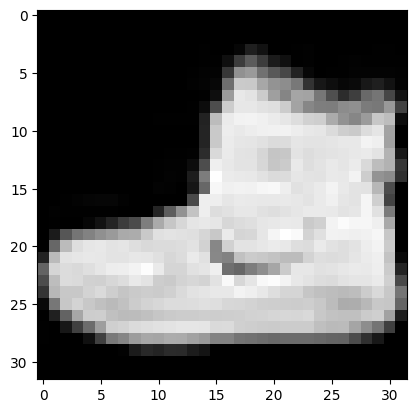

In [8]:
plt.imshow(train_dataset[0][0].numpy().reshape(32,32), cmap='gray');

In [18]:
# model = nn.Sequential(
#     nn.Conv2d(1, 6, kernel_size=4, padding=0),
#     nn.Tanh(),
#     nn.AvgPool2d(2, stride=2),
#     nn.Conv2d(6, 16, kernel_size=4),
#     nn.Tanh(),
#     nn.AvgPool2d(2, stride=2),
#     nn.Conv2d(16, 120, kernel_size=4),
#     nn.Flatten(),
#     torch.nn.Dropout(0.2),
#     nn.Linear(120, 84),
#     nn.Tanh(),
#     nn.Linear(84, 10)
# )
model = torch.nn.Sequential(
    torch.nn.Conv2d(1, 32, kernel_size = 3, padding = 1, padding_mode = 'replicate'),
    torch.nn.MaxPool2d(kernel_size=2),
    torch.nn.ReLU(),
    torch.nn.Conv2d(32, 64, kernel_size = 3, padding = 1, padding_mode = 'replicate'),
    torch.nn.MaxPool2d(kernel_size=2),
    torch.nn.ReLU(),
    torch.nn.Conv2d(64, 128, kernel_size = 3, padding = 1, padding_mode = 'replicate'),
    torch.nn.MaxPool2d(kernel_size=2),
    torch.nn.ReLU(),
    torch.nn.Flatten(),
    torch.nn.Dropout(0.2),
    torch.nn.Linear(1152, 10)
    )
model.to(device)

Sequential(
  (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), padding_mode=replicate)
  (1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (2): ReLU()
  (3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), padding_mode=replicate)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): ReLU()
  (6): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), padding_mode=replicate)
  (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (8): ReLU()
  (9): Flatten(start_dim=1, end_dim=-1)
  (10): Dropout(p=0.2, inplace=False)
  (11): Linear(in_features=1152, out_features=10, bias=True)
)

In [8]:
def train(net, train_iter, test_iter, optimizer, num_epochs, device):
    loss = nn.CrossEntropyLoss()

    for epoch in range(num_epochs):
        train_l_sum, train_acc_sum, n, start = 0.0, 0.0, 0, time.time()
    
        for X, y in train_iter:
            X, y = X.to(device), y.to(device)
            optimizer.zero_grad()
            y_hat = net(X)
            l = loss(y_hat, y)
            l.backward()
            optimizer.step()
            train_l_sum += l.item()
            train_acc_sum += (y_hat.argmax(axis=1) == y).sum().item()
            n += y.shape[0]
    
        test_acc = evaluate_accuracy(test_iter, net, device)
        print(f'epoch {epoch + 1}, loss {train_l_sum / n:.4f}, train acc {train_acc_sum / n:.3f}' \
              f', test acc {test_acc:.3f}, time {time.time() - start:.1f} sec')

In [9]:
def evaluate_accuracy(data_iter, net, device):
    acc_sum, n = torch.Tensor([0]).to(device), 0
    for X, y in data_iter:
        X, y = X.to(device), y.to(device)
        acc_sum += (net(X).argmax(axis=1) == y).sum()
        n += y.shape[0]
    return acc_sum.item() / n

In [19]:
num_epochs = 20
trainer = torch.optim.Adam(model.parameters(), lr=0.001)
train(model, train_iter, test_iter, trainer, num_epochs, device)

epoch 1, loss 0.0028, train acc 0.750, test acc 0.822, time 6.1 sec
epoch 2, loss 0.0016, train acc 0.854, test acc 0.854, time 5.6 sec
epoch 3, loss 0.0014, train acc 0.875, test acc 0.865, time 5.7 sec
epoch 4, loss 0.0012, train acc 0.887, test acc 0.873, time 5.6 sec
epoch 5, loss 0.0011, train acc 0.894, test acc 0.878, time 5.8 sec
epoch 6, loss 0.0011, train acc 0.900, test acc 0.886, time 5.5 sec
epoch 7, loss 0.0010, train acc 0.906, test acc 0.892, time 5.4 sec
epoch 8, loss 0.0010, train acc 0.911, test acc 0.896, time 5.8 sec
epoch 9, loss 0.0009, train acc 0.914, test acc 0.897, time 5.7 sec
epoch 10, loss 0.0009, train acc 0.918, test acc 0.898, time 5.8 sec
epoch 11, loss 0.0009, train acc 0.921, test acc 0.899, time 5.6 sec
epoch 12, loss 0.0008, train acc 0.924, test acc 0.898, time 5.4 sec
epoch 13, loss 0.0008, train acc 0.925, test acc 0.903, time 6.1 sec
epoch 14, loss 0.0008, train acc 0.929, test acc 0.898, time 5.5 sec
epoch 15, loss 0.0007, train acc 0.930, tes